In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import learning_curve

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


## Splitting & Using DT


## Using Evaluation Metrics

Accuracy =  92.25352112676056 %
Precision =  0.8787710585256597
Recall =  0.9059857271064168
F1-score =  0.8917320242746044


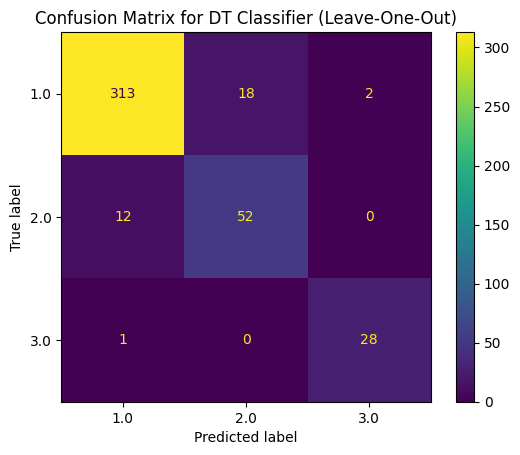

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.74      0.81      0.78        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.92       426
   macro avg       0.88      0.91      0.89       426
weighted avg       0.93      0.92      0.92       426



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



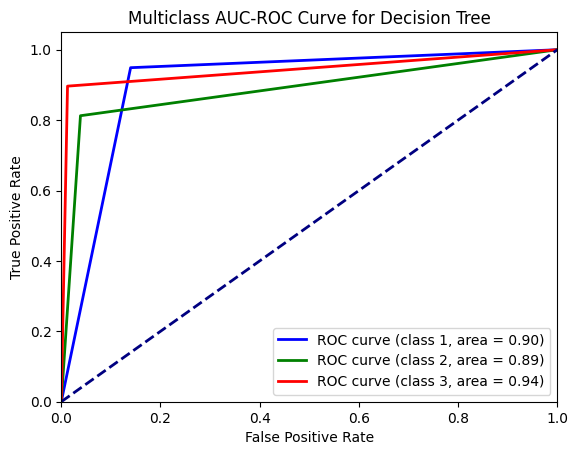

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


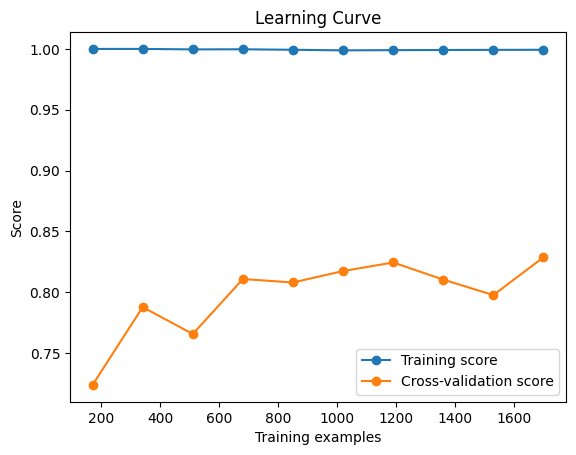

In [7]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

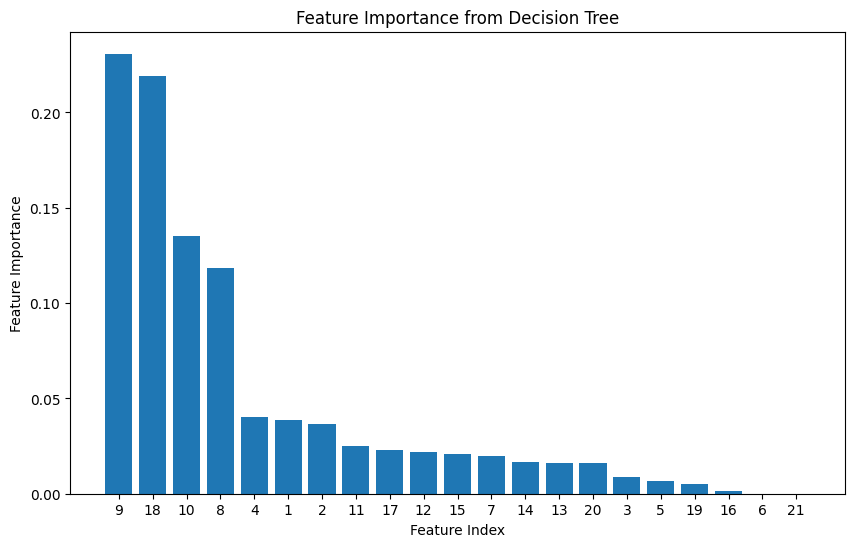

In [8]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the indices of features sorted by importance
sorted_feature_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_feature_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(X.shape[1]), sorted_feature_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


In [9]:
top_k_features_indices = sorted_feature_indices[:15]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]


# print("Adjusted X based on Important Features:")
# print(X_selected)

Indices of Important Features: [ 8 17  9  7  3  0  1 10 16 11 14  6 13 12 19]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


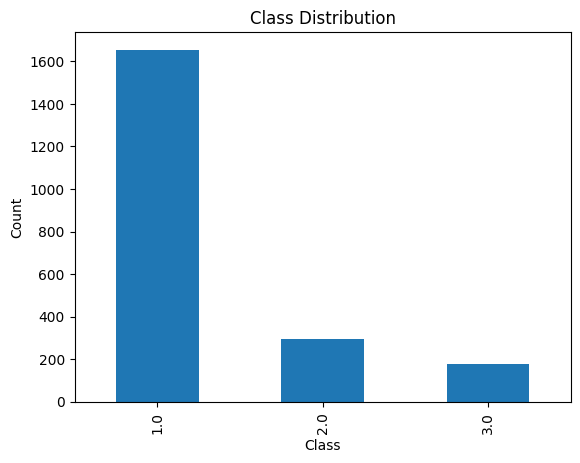

In [10]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [11]:
# scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_selected)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]


Feature names during training: Index(['mean_value_of_short_term_variability', 'histogram_mean',
       'percentage_of_time_with_abnormal_long_term_variability',
       'abnormal_short_term_variability', 'uterine_contractions',
       'baseline value', 'accelerations',
       'mean_value_of_long_term_variability', 'histogram_mode',
       'histogram_width', 'histogram_number_of_peaks',
       'prolongued_decelerations', 'histogram_max', 'histogram_min',
       'histogram_variance'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
     

Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


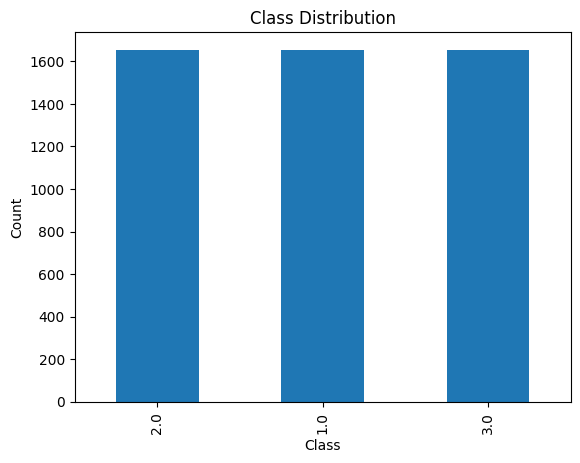

In [12]:


y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using DT

In [13]:


from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

# y_pred_res = DT_after_smote.predict(X_test)
DT_after_smote =  DecisionTreeClassifier()
DT_after_smote.fit(X_resampled, y_resampled)
y_pred_full = DT_after_smote.predict(X_resampled)
y_pred_test = DT_after_smote.predict(X_test_aligned)

# cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# k_folds = 5  # You can change this to the desired number of folds

# # Initialize K-Fold Cross-Validation
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform K-Fold Cross-Validation
# # cross_val_results = cross_val_score(gradient_boosting, X, y, cv=kf)

# y_pred_res = cross_val_predict(DT_after_smote, X_resampled, y_resampled, cv=kf)
# X_test_aligned = X_test[:, top_k_features_indices]



Holdout CV : 0.8894117647058823
k-Fold CV : 0.9129807215779562
Stratified k-Fold CV: 0.9191065587698058


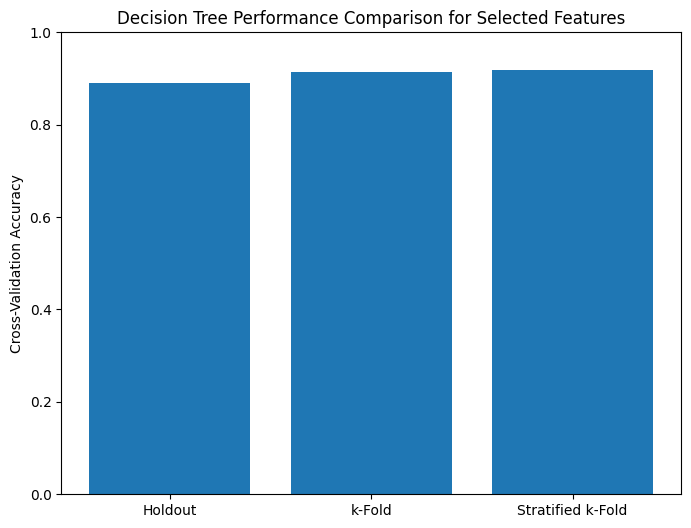

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Assuming X_selected and y are already defined

cv_scores_holdout = []
cv_scores_kfold = []
cv_scores_stratified_kfold = []

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Cross-validation
scores_holdout = cross_val_score(tree_classifier, X_train, y_train, cv=2, scoring='accuracy')
cv_scores_holdout.append(scores_holdout.mean())
print(f'Holdout CV : {scores_holdout.mean()}')

kf = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold = cross_val_score(tree_classifier, X_selected, y, cv=kf, scoring='accuracy')
cv_scores_kfold.append(scores_kfold.mean())
print(f'k-Fold CV : {scores_kfold.mean()}')

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold = cross_val_score(tree_classifier, X_selected, y, cv=skf, scoring='accuracy')
cv_scores_stratified_kfold.append(scores_stratified_kfold.mean())
print(f'Stratified k-Fold CV: {scores_stratified_kfold.mean()}')

plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'k-Fold', 'Stratified k-Fold'],
        [cv_scores_holdout[0], cv_scores_kfold[0], cv_scores_stratified_kfold[0]])
plt.title(f'Decision Tree Performance Comparison for Selected Features')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

Accuracy (Resampled): 99.95971802618328 %
Precision (macro, Resampled): 0.9995976664654999
Recall (macro, Resampled): 0.9995971802618328
F1-score (macro, Resampled): 0.999597180114766
Confusion Matrix (Resampled):


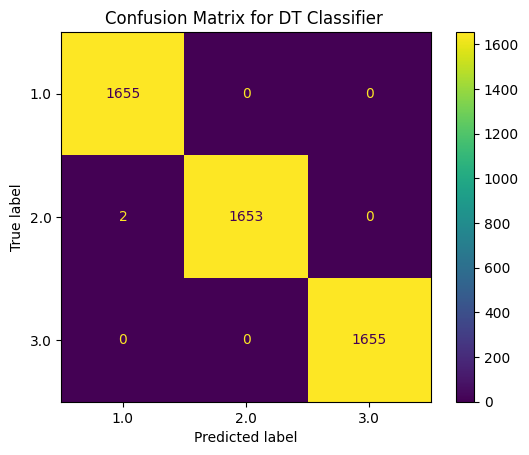

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1655
         2.0       1.00      1.00      1.00      1655
         3.0       1.00      1.00      1.00      1655

    accuracy                           1.00      4965
   macro avg       1.00      1.00      1.00      4965
weighted avg       1.00      1.00      1.00      4965

Test Accuracy: 99.53051643192488 %
Test Precision (macro): 0.9980099502487563
Test Recall (macro): 0.9895833333333334
Test F1-score (macro): 0.9937109907169788


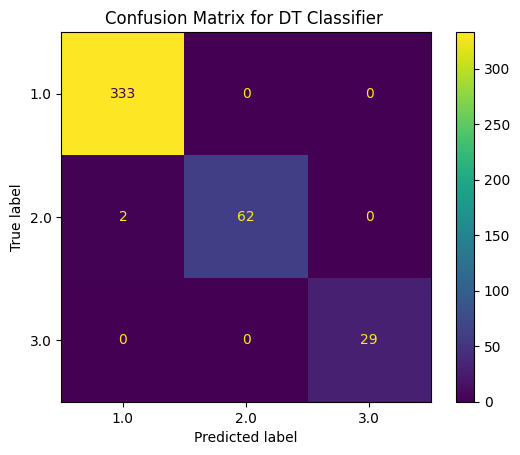

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier ')
plt.show()



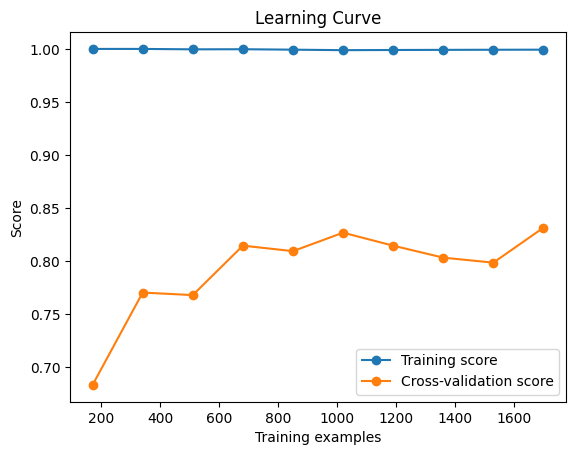

In [16]:
train_sizes, train_scores, test_scores = learning_curve(DT_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

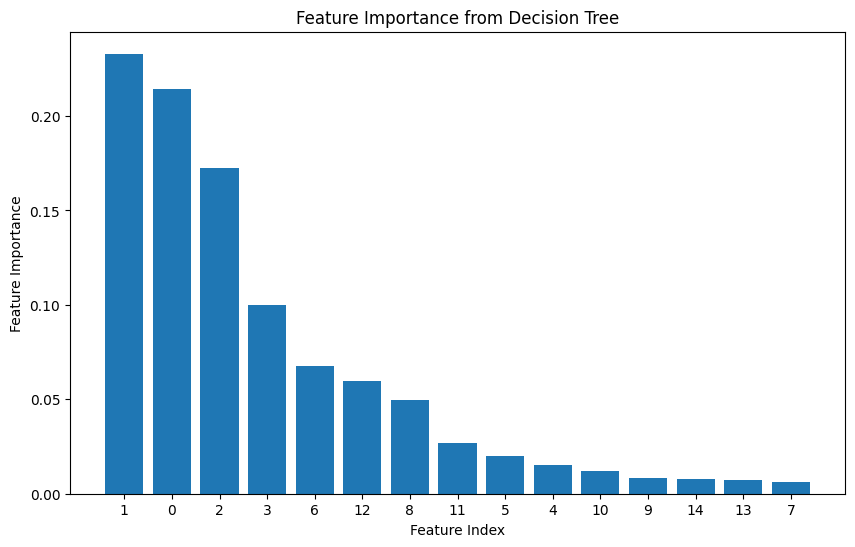

In [17]:
feature_importances = DT_after_smote.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

num_features_to_plot = 15

plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_plot), feature_importances[sorted_feature_indices[:num_features_to_plot]])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(num_features_to_plot), sorted_feature_indices[:num_features_to_plot])
plt.show()


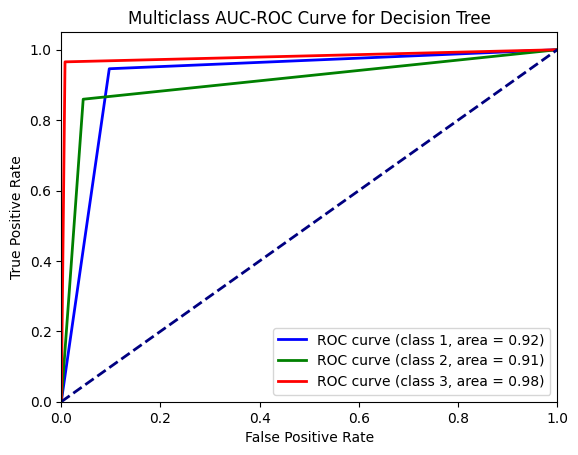

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
